# EDA & Baselines
Use this notebook to explore OHLCV data quality, visualize feature distributions, and sanity‑check labels.

In [1]:
import os
os.chdir("..")
print("CWD:", os.getcwd())



CWD: /home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter


In [2]:
import os
os.environ["PYTHONPATH"] = os.getcwd()
print("PYTHONPATH:", os.environ["PYTHONPATH"])


PYTHONPATH: /home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter


In [ ]:
# Scripts moved to run_pipeline.sh


Saved data/raw/ohlcv_AAPL.csv (1973 rows)
Saved data/raw/ohlcv_TSLA.csv (1973 rows)
Saved data/raw/ohlcv_MSFT.csv (1973 rows)
Saved data/raw/ohlcv_SPY.csv (1973 rows)
Saved data/raw/ohlcv_NVDA.csv (1973 rows)
Saved data/raw/ohlcv_GOOG.csv (1973 rows)
Saved data/raw/ohlcv_AMZN.csv (1973 rows)
Saved data/raw/ohlcv_META.csv (1973 rows)
Saved data/raw/ohlcv_NFLX.csv (1973 rows)
Saved data/raw/ohlcv_AMD.csv (1973 rows)
/home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter/src/features/technical.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out['ret_1d'] = out['close'].pct_change()
/home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter/src/features/technical.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will b

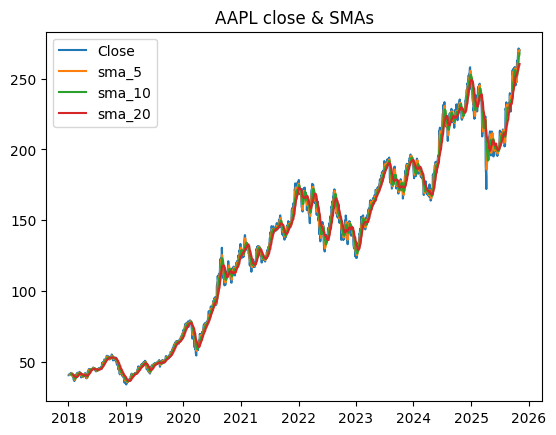

In [4]:
import pandas as pd, matplotlib.pyplot as plt
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"]).sort_values("date")
t = "AAPL"; d = df[df["ticker"]==t]
plt.plot(d["date"], d["close"], label="Close")
for col in ["sma_5","sma_10","sma_20"]:
    if col in d: plt.plot(d["date"], d[col], label=col)
plt.legend(); plt.title(f"{t} close & SMAs"); plt.show()


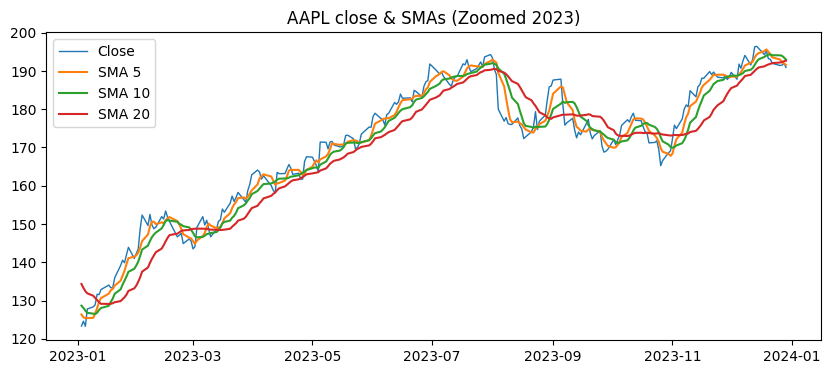

In [5]:
plt.figure(figsize=(10,4))
subset = d[d["date"].between("2023-01-01", "2024-01-01")]
plt.plot(subset["date"], subset["close"], label="Close", linewidth=1)
plt.plot(subset["date"], subset["sma_5"], label="SMA 5")
plt.plot(subset["date"], subset["sma_10"], label="SMA 10")
plt.plot(subset["date"], subset["sma_20"], label="SMA 20")
plt.title("AAPL close & SMAs (Zoomed 2023)")
plt.legend(); plt.show()


In [6]:
import shutil, os
for p in ["data/raw", "data/processed"]:
    if os.path.isdir(p):
        shutil.rmtree(p)
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)


In [ ]:
# Scripts moved to run_pipeline.sh


Saved data/raw/ohlcv_AAPL.csv (1973 rows)
Saved data/raw/ohlcv_TSLA.csv (1973 rows)
Saved data/raw/ohlcv_MSFT.csv (1973 rows)
Saved data/raw/ohlcv_SPY.csv (1973 rows)
Saved data/raw/ohlcv_NVDA.csv (1973 rows)
Saved data/raw/ohlcv_GOOG.csv (1973 rows)
Saved data/raw/ohlcv_AMZN.csv (1973 rows)
Saved data/raw/ohlcv_META.csv (1973 rows)
Saved data/raw/ohlcv_NFLX.csv (1973 rows)
Saved data/raw/ohlcv_AMD.csv (1973 rows)
/home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter/src/features/technical.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out['ret_1d'] = out['close'].pct_change()
/home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter/src/features/technical.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will b

In [11]:
import pandas as pd, glob
paths = glob.glob("data/raw/ohlcv_*.csv")
for p in paths:
    df = pd.read_csv(p, nrows=3)  # small sniff
    print(p, "dtypes:", dict(df.dtypes))


data/raw/ohlcv_MSFT.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_NVDA.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_AMZN.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_SPY.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_AAPL.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_AMD.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'l

In [ ]:
# Scripts moved to run_pipeline.sh


Saved data/raw/ohlcv_AAPL.csv (1973 rows)
Saved data/raw/ohlcv_TSLA.csv (1973 rows)
Saved data/raw/ohlcv_MSFT.csv (1973 rows)
Saved data/raw/ohlcv_SPY.csv (1973 rows)
Saved data/raw/ohlcv_NVDA.csv (1973 rows)
Saved data/raw/ohlcv_GOOG.csv (1973 rows)
Saved data/raw/ohlcv_AMZN.csv (1973 rows)
Saved data/raw/ohlcv_META.csv (1973 rows)
Saved data/raw/ohlcv_NFLX.csv (1973 rows)
Saved data/raw/ohlcv_AMD.csv (1973 rows)
/home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter/src/features/technical.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out['ret_1d'] = out['close'].pct_change()
/home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter/src/features/technical.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will b

In [10]:
import pandas as pd
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"]).sort_values("date")
df.dtypes  # confirm numeric types
df.tail()


,date,ticker,open,high,low,close,volume,ret_1d,sma_5,mom_5,sma_10,mom_10,sma_20,mom_20,vol_20,rsi,y
11843,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.035377,NaN,-0.025741,NaN,-0.029173,0.183448,NaN,0
13817,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.005847,NaN,0.090812,NaN,0.100648,0.608980,NaN,0
15791,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.010110,NaN,0.122256,NaN,0.175633,0.272497,NaN,0
17765,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.037853,NaN,0.071640,NaN,0.013709,0.413800,NaN,0
19739,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.004643,NaN,0.040681,NaN,0.063376,0.235674,NaN,0


In [14]:
import pandas as pd

df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"]).sort_values(["ticker","date"])

# last 5 rows for each ticker
"""
tail_per_ticker = (df.groupby("ticker", group_keys=True)
                     .apply(lambda g: g.tail(5))
                     .reset_index(drop=True))
tail_per_ticker.head(10)
"""

pass

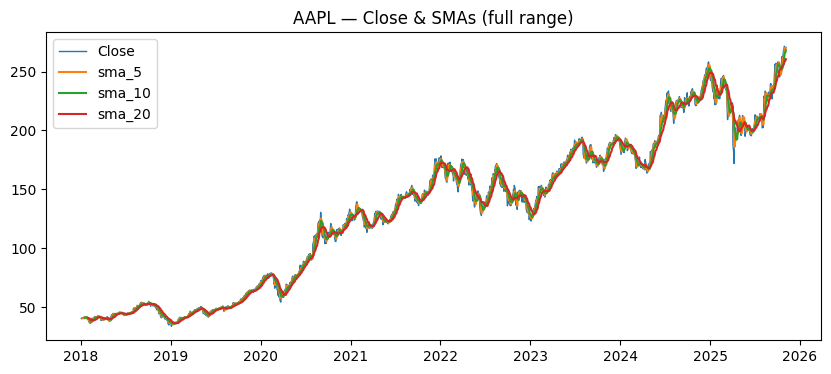

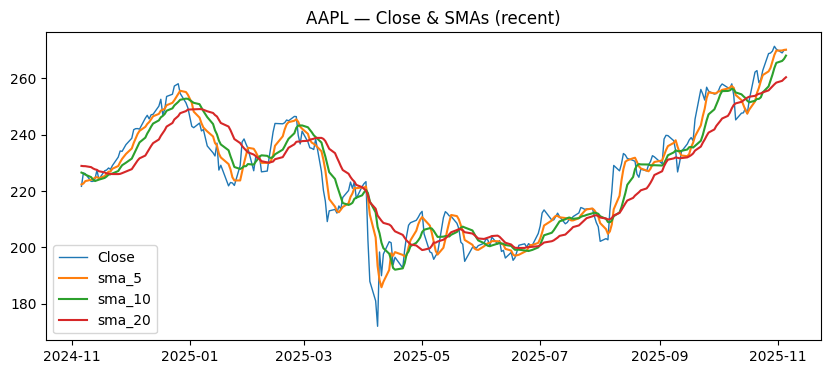

In [15]:
import matplotlib.pyplot as plt

aapl = df[df["ticker"]=="AAPL"].sort_values("date")

# full range
plt.figure(figsize=(10,4))
plt.plot(aapl["date"], aapl["close"], label="Close", linewidth=1)
for col in ["sma_5","sma_10","sma_20"]:
    if col in aapl: plt.plot(aapl["date"], aapl[col], label=col)
plt.title("AAPL — Close & SMAs (full range)")
plt.legend(); plt.show()

# zoom into the most recent ~250 trading days (~1 year)
recent = aapl.tail(250)
plt.figure(figsize=(10,4))
plt.plot(recent["date"], recent["close"], label="Close", linewidth=1)
for col in ["sma_5","sma_10","sma_20"]:
    if col in recent: plt.plot(recent["date"], recent[col], label=col)
plt.title("AAPL — Close & SMAs (recent)")
plt.legend(); plt.show()


In [17]:
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"])
df = df.sort_values(["ticker", "date"])

train_df = df[df["date"] < "2024-01-01"]
test_df  = df[df["date"] >= "2024-01-01"]

X_train, y_train = train_df.drop(columns=["y"]), train_df["y"]
X_test,  y_test  = test_df.drop(columns=["y"]),  test_df["y"]


In [19]:
test_df.head()

,date,ticker,open,high,low,close,volume,ret_1d,sma_5,mom_5,sma_10,mom_10,sma_20,mom_20,vol_20,rsi,y
19275,2024-01-02,AAPL,187.149994,188.440002,183.889999,184.081497,82488700.0,-0.035787,189.981549,-0.041116,191.765445,-0.060384,192.399578,-0.029283,0.191685,31.663486,0
19276,2024-01-03,AAPL,184.220001,185.880005,183.429993,182.703186,58414500.0,-0.007488,188.236328,-0.045584,190.611218,-0.059421,192.142754,-0.027345,0.190710,24.387853,0
19277,2024-01-04,AAPL,182.149994,183.089996,180.880005,180.382828,71983600.0,-0.012700,186.007205,-0.058193,189.120839,-0.076318,191.572086,-0.059508,0.175187,8.867220,0
19278,2024-01-05,AAPL,181.990005,182.759995,180.169998,179.658951,62379700.0,-0.004013,183.548026,-0.064056,187.767299,-0.070061,191.019761,-0.057924,0.174948,7.864570,1
19279,2024-01-08,AAPL,182.089996,185.600006,181.500000,184.002182,59144500.0,0.024175,182.165729,-0.036202,186.862958,-0.046846,190.587917,-0.044834,0.194811,24.905987,0


In [20]:
import os, numpy as np, pandas as pd
os.environ["PYTHONPATH"] = os.getcwd()

from scripts.LogisticRegression import LogisticRegression, add_intercept

# Load and prepare data
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"]).sort_values(["ticker","date"])

feat_cols = [c for c in df.columns if c.startswith(("sma_","mom_","vol_","rsi"))] + ["ret_1d"]

# Drop warm-up NaNs per ticker
def drop_warmup(g):
    return g.dropna(subset=feat_cols + ["y"])
clean = df.groupby("ticker", group_keys=False).apply(drop_warmup)

# Chronological split
train = clean[clean["date"] < "2024-01-01"]
test  = clean[clean["date"] >= "2024-01-01"]

Xtr = train[feat_cols].to_numpy(float)
Xte = test [feat_cols].to_numpy(float)
ytr = train["y"].to_numpy(int)
yte = test ["y"].to_numpy(int)

# Add intercept
Xtr = add_intercept(Xtr)
Xte = add_intercept(Xte)

# Train (set verbose=False if you want a quiet run; l2>0 for regularization)
clf = LogisticRegression(max_iter=200, eps=1e-6, verbose=True, l2=0.0)
clf.fit(Xtr, ytr)

# Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

p = clf.predict_proba(Xte)
yhat = (p >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(yte, yhat))
print("Test ROC AUC :", roc_auc_score(yte, p))
print(classification_report(yte, yhat, digits=3))

# Save model (optional)
# clf.save("models/logreg_baseline.npz", feature_names=["(intercept)"] + feat_cols)


/tmp/ipykernel_3648/1321098960.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clean = df.groupby("ticker", group_keys=False).apply(drop_warmup)


iter   0 | step_L1 4.105e+00 | avg_loglik -0.693147
iter   3 | step_L1 5.606e-14 | avg_loglik -0.690309
Test Accuracy: 0.5338362068965518
Test ROC AUC : 0.5182561154070195
              precision    recall  f1-score   support

           0      0.491     0.302     0.374      2138
           1      0.551     0.732     0.629      2502

    accuracy                          0.534      4640
   macro avg      0.521     0.517     0.501      4640
weighted avg      0.523     0.534     0.511      4640



In [21]:
from scripts.LogisticRegression import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd, numpy as np

lambdas = [0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
results = []

for lam in lambdas:
    clf = LogisticRegression(max_iter=200, eps=1e-6, verbose=False, l2=lam)
    clf.fit(Xtr, ytr)
    p = clf.predict_proba(Xte)
    auc = roc_auc_score(yte, p)
    acc = accuracy_score(yte, (p >= 0.5).astype(int))
    results.append({"lambda": lam, "AUC": auc, "Acc": acc})

res = pd.DataFrame(results)
print(res.sort_values("AUC", ascending=False))


     lambda       AUC       Acc
3  0.000100  0.518923  0.532974
2  0.000010  0.518489  0.532543
1  0.000001  0.518287  0.534052
0  0.000000  0.518256  0.533836
4  0.001000  0.516322  0.533405
5  0.010000  0.513427  0.527155


In [ ]:
# Scripts moved to run_pipeline.sh


/home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter/scripts/make_labels.py:36: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.iloc[:-args.horizon_days] if len(g) > args.horizon_days else g.dropna(subset=[label_col]))
Saved data/processed/technical_only_h5.csv with label column 'y_h5'


In [23]:
import os, numpy as np, pandas as pd
os.environ["PYTHONPATH"] = os.getcwd()

from scripts.LogisticRegression import LogisticRegression, add_intercept

# 1) Load the H=5 dataset
df = pd.read_csv("data/processed/technical_only_h5.csv", parse_dates=["date"])\
       .sort_values(["ticker","date"])

# 2) Features: same technical indicators as before (do NOT include any forward-return columns)
feat_cols = [c for c in df.columns if c.startswith(("sma_","mom_","vol_","rsi"))] + ["ret_1d"]

# 3) Drop warm-up NaNs per ticker (now using the y_h5 label)
def drop_warmup(g):
    return g.dropna(subset=feat_cols + ["y_h5"])

clean = df.groupby("ticker", group_keys=False).apply(drop_warmup)

# 4) Chronological split (same date cut as before)
train = clean[clean["date"] < "2024-01-01"]
test  = clean[clean["date"] >= "2024-01-01"]

Xtr = train[feat_cols].to_numpy(float)
Xte = test [feat_cols].to_numpy(float)
ytr = train["y_h5"].to_numpy(int)
yte = test ["y_h5"].to_numpy(int)

# 5) Add intercept
Xtr = add_intercept(Xtr)
Xte = add_intercept(Xte)

# 6) Train (you can set l2=1e-3 for mild regularization; here 0.0 to match your earlier run)
clf = LogisticRegression(max_iter=200, eps=1e-6, verbose=True, l2=0.0)
clf.fit(Xtr, ytr)

# 7) Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

p = clf.predict_proba(Xte)
yhat = (p >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(yte, yhat))
print("Test ROC AUC :", roc_auc_score(yte, p))
print(classification_report(yte, yhat, digits=3))

#8) (Optional) Save model
from pathlib import Path
Path("models").mkdir(exist_ok=True)
clf.save("models/logreg_baseline_h5.npz", feature_names=["(intercept)"] + feat_cols)


iter   0 | step_L1 3.642e+00 | avg_loglik -0.693147
iter   3 | step_L1 5.681e-12 | avg_loglik -0.681898
Test Accuracy: 0.5518518518518518
Test ROC AUC : 0.5080976378912052
              precision    recall  f1-score   support

           0      0.426     0.215     0.286      1914
           1      0.585     0.793     0.674      2676

    accuracy                          0.552      4590
   macro avg      0.506     0.504     0.480      4590
weighted avg      0.519     0.552     0.512      4590



/tmp/ipykernel_3648/1986447659.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clean = df.groupby("ticker", group_keys=False).apply(drop_warmup)


In [24]:
print("Train y_h5 mean (fraction of 1s):", ytr.mean().round(3))
print("Test  y_h5 mean (fraction of 1s):", yte.mean().round(3))


Train y_h5 mean (fraction of 1s): 0.567
Test  y_h5 mean (fraction of 1s): 0.583


In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from scripts.LogisticRegression import LogisticRegression, add_intercept

# Rebuild design matrices from your existing train/test DataFrames
Xtr_raw = train[feat_cols].to_numpy(float)
Xte_raw = test [feat_cols].to_numpy(float)
ytr = train["y_h5"].to_numpy(int)
yte = test ["y_h5"].to_numpy(int)

# Standardize (fit on train, apply to test)
scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr_raw)
Xte = scaler.transform(Xte_raw)

# Add intercept
Xtr = add_intercept(Xtr)
Xte = add_intercept(Xte)

lambdas = [0.0, 1e-3, 1e-2]  # tiny sweep
for lam in lambdas:
    clf = LogisticRegression(max_iter=200, eps=1e-6, verbose=False, l2=lam)
    clf.fit(Xtr, ytr)
    p = clf.predict_proba(Xte)
    yhat = (p >= 0.5).astype(int)
    print(f"\nL2={lam:g}")
    print("  Test AUC :", roc_auc_score(yte, p))
    print("  Accuracy :", accuracy_score(yte, yhat))
    print(classification_report(yte, yhat, digits=3))



L2=0
  Test AUC : 0.5080976378912052
  Accuracy : 0.5518518518518518
              precision    recall  f1-score   support

           0      0.426     0.215     0.286      1914
           1      0.585     0.793     0.674      2676

    accuracy                          0.552      4590
   macro avg      0.506     0.504     0.480      4590
weighted avg      0.519     0.552     0.512      4590


L2=0.001
  Test AUC : 0.5091617036297723
  Accuracy : 0.5494553376906318
              precision    recall  f1-score   support

           0      0.419     0.210     0.279      1914
           1      0.584     0.793     0.672      2676

    accuracy                          0.549      4590
   macro avg      0.502     0.501     0.476      4590
weighted avg      0.515     0.549     0.508      4590


L2=0.01
  Test AUC : 0.509125583967087
  Accuracy : 0.5481481481481482
              precision    recall  f1-score   support

           0      0.418     0.212     0.281      1914
           1      0.5

In [26]:
coef_df = pd.DataFrame({
    "feature": ["(intercept)"] + feat_cols,
    "theta": clf.theta
}).sort_values("theta", ascending=False)
print(coef_df.head(10))
print(coef_df.tail(10))


       feature     theta
0  (intercept)  0.259011
4       mom_10  0.034219
8          rsi  0.006801
6       mom_20 -0.003858
5       sma_20 -0.028165
9       ret_1d -0.030124
3       sma_10 -0.032071
2        mom_5 -0.037238
1        sma_5 -0.044124
7       vol_20 -0.092523
       feature     theta
0  (intercept)  0.259011
4       mom_10  0.034219
8          rsi  0.006801
6       mom_20 -0.003858
5       sma_20 -0.028165
9       ret_1d -0.030124
3       sma_10 -0.032071
2        mom_5 -0.037238
1        sma_5 -0.044124
7       vol_20 -0.092523


# Sentiments

In [27]:
import os
os.chdir("/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter")
print("CWD:", os.getcwd())


FileNotFoundError: [Errno 2] No such file or directory: '/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter'

In [28]:
import os
os.environ["PYTHONPATH"] = os.getcwd()
print("PYTHONPATH:", os.environ["PYTHONPATH"])

PYTHONPATH: /home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter


In [27]:
%cd "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter"
%env PYTHONPATH=.



/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter
env: PYTHONPATH=.


In [29]:
import json, textwrap, yfinance as yf

raw = yf.Ticker("AAPL").news or []
print("items =", len(raw))
if raw:
    print("type(content) =", type(raw[0].get("content")))
    print(textwrap.shorten(str(raw[0].get("content")), width=300, placeholder="..."))


items = 10
type(content) = <class 'dict'>
{'id': 'd95a4591-a4dc-4729-96ec-3c8ac1817991', 'contentType': 'STORY', 'title': "Elon Musk's pay package is a clear signal that Tesla is done being just a car company", 'description': '', 'summary': "We've seen Amazon without Jeff Bezos, Apple without Steve Jobs, and Microsoft without Bill Gates,...


In [30]:
# Writes scripts/merge_features.py
from pathlib import Path
code = r"""#!/usr/bin/env python
import argparse, os
import pandas as pd

def main(tech_path, out_path, sent_path=None, label_col="y_h5"):
    # Load technical features (+ labels)
    tech = pd.read_csv(tech_path, parse_dates=["date"]).sort_values(["ticker","date"])

    # Basic sanity
    if "ticker" not in tech.columns or "date" not in tech.columns:
        raise ValueError(f"{tech_path} must contain 'date' and 'ticker' columns")
    if label_col not in tech.columns:
        raise ValueError(f"Label column '{label_col}' not found in {tech_path}")

    merged = tech.copy()

    # Optionally bring in sentiment features
    if sent_path:
        sent = pd.read_csv(sent_path, parse_dates=["date"]).sort_values(["ticker","date"])
        if "ticker" not in sent.columns or "date" not in sent.columns:
            raise ValueError(f"{sent_path} must contain 'date' and 'ticker' columns")
        # Determine sentiment feature columns (everything except keys)
        sent_feat_cols = [c for c in sent.columns if c not in ("date","ticker")]
        if len(sent_feat_cols) == 0:
            print(f"[warn] No sentiment columns found in {sent_path}; performing a no-op merge.")
        merged = pd.merge(
            merged,
            sent[["date","ticker"] + sent_feat_cols],
            on=["date","ticker"],
            how="left",
            validate="m:1"
        )

    # Write
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    merged.to_csv(out_path, index=False)
    print(f"[ok] wrote {out_path} | rows={len(merged)} | cols={len(merged.columns)}")

if __name__ == "__main__":
    ap = argparse.ArgumentParser()
    ap.add_argument("--tech", required=True, help="CSV with technical features and labels (must include date,ticker,label)")
    ap.add_argument("--sent", default=None, help="CSV with sentiment features (must include date,ticker)")
    ap.add_argument("--out", required=True, help="Output CSV")
    ap.add_argument("--label_col", default="y_h5", help="Name of label column to keep/check (default: y_h5)")
    args = ap.parse_args()
    main(args.tech, args.out, args.sent, args.label_col)
"""
Path("scripts").mkdir(parents=True, exist_ok=True)
Path("scripts/merge_features.py").write_text(code)
print("Wrote scripts/merge_features.py")


Wrote scripts/merge_features.py


In [31]:
import sys
sys.path.insert(0, "scripts")
from LogisticRegression import LogisticRegression


In [ ]:
# Scripts moved to run_pipeline.sh


[Errno 2] No such file or directory: '/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter'
/home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter/notebooks
env: PYTHONPATH=.
Saved data/raw/ohlcv_AAPL.csv (1973 rows)
Saved data/raw/ohlcv_TSLA.csv (1973 rows)
Saved data/raw/ohlcv_MSFT.csv (1973 rows)
Saved data/raw/ohlcv_SPY.csv (1973 rows)
Saved data/raw/ohlcv_NVDA.csv (1973 rows)
Saved data/raw/ohlcv_GOOG.csv (1973 rows)
Saved data/raw/ohlcv_AMZN.csv (1973 rows)
Saved data/raw/ohlcv_META.csv (1973 rows)
Saved data/raw/ohlcv_NFLX.csv (1973 rows)
Saved data/raw/ohlcv_AMD.csv (1973 rows)
/home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter/src/features/technical.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values

In [ ]:
# Scripts moved to run_pipeline.sh


OK sys.path patched
Import OK -> scripts.fetch_ohlcv
Saved data/raw/ohlcv_AAPL.csv (1973 rows)
Saved data/raw/ohlcv_TSLA.csv (1973 rows)
Saved data/raw/ohlcv_MSFT.csv (1973 rows)
Saved data/raw/ohlcv_SPY.csv (1973 rows)
Saved data/raw/ohlcv_NVDA.csv (1973 rows)
Saved data/raw/ohlcv_GOOG.csv (1973 rows)
Saved data/raw/ohlcv_AMZN.csv (1973 rows)
Saved data/raw/ohlcv_META.csv (1973 rows)
Saved data/raw/ohlcv_NFLX.csv (1973 rows)
Saved data/raw/ohlcv_AMD.csv (1973 rows)
OHLCV files found: 10
['data/raw/ohlcv_AAPL.csv', 'data/raw/ohlcv_AMD.csv', 'data/raw/ohlcv_AMZN.csv', 'data/raw/ohlcv_GOOG.csv', 'data/raw/ohlcv_META.csv'] ...
Sample file columns: ['date', 'ticker', 'open', 'high', 'low', 'close', 'volume'] | rows: 1974


In [33]:
# Crée l’arborescence src/utils + les __init__.py si besoin
import os, textwrap, pathlib
root = pathlib.Path("/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter")
os.chdir(root)

(os.makedirs("src/utils", exist_ok=True))
open("src/__init__.py","a").close()
open("src/utils/__init__.py","a").close()

code = textwrap.dedent("""
    import os, yaml

    def ensure_dir(path: str):
        os.makedirs(path, exist_ok=True)

    def load_config(path: str):
        with open(path, "r") as f:
            return yaml.safe_load(f)
""")
with open("src/utils/io.py","w") as f:
    f.write(code)

print("Wrote src/utils/io.py")


Wrote src/utils/io.py


In [34]:
# Assure l'import comme tout à l’heure
import os, sys, pathlib, subprocess, shlex
root = str(pathlib.Path(".").resolve())
src  = str(pathlib.Path("src").resolve())
for p in [root, src]:
    if p not in sys.path:
        sys.path.insert(0, p)

# Option A: import direct
try:
    from scripts.build_technical_features import main as build_feats
    build_feats("configs/default.yaml")
except Exception as e:
    print("[warn] import direct a échoué, on lance en sous-processus:", e)
    env = os.environ.copy()
    env["PYTHONPATH"] = os.pathsep.join([root, src, env.get("PYTHONPATH","")])
    cmd = "python -m scripts.build_technical_features --config configs/default.yaml"
    subprocess.run(shlex.split(cmd), check=True, env=env)

import pandas as pd
tech = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"])
print("dates:", tech["date"].min().date(), "→", tech["date"].max().date(), "| rows:", len(tech))


/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/src/features/technical.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out['ret_1d'] = out['close'].pct_change()
/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/src/features/technical.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out[f'mom_{w}'] = out['close'].pct_change(w)
/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/src/features/technical.py:10: FutureWarning: The default fill_metho

Saved data/processed/technical_only.csv
dates: 2018-01-02 → 2025-11-04 | rows: 19730


In [64]:
# Scripts moved to run_pipeline.sh

In [40]:
# Scripts moved to run_pipeline.sh

In [ ]:
# FinBERT sentiment analysis moved to scripts/build_sentiment_finbert.py
# Run: uv run scripts/build_sentiment_finbert.py --input data/raw/news/headlines.csv
# This script generates sent_headlines_triplet.csv and sent_headlines_score.csv


Device set to use cuda:0


✅ FinBERT loaded and ready


FinBERT: 100%|██████████| 14/14 [00:02<00:00,  5.57it/s]

[ok] wrote data/processed/sent_headlines_triplet.csv | rows=870 cols=5
[ok] wrote data/processed/sent_headlines_score.csv   | rows=870 cols=3


In [44]:
import pandas as pd
from pathlib import Path

# --- Load your technical-only dataset ---
path_tech = Path("data/processed/technical_only.csv")
df_tech = pd.read_csv(path_tech)

# --- Optional: ensure date column is datetime and sorted ---
if "date" in df_tech.columns:
    df_tech["date"] = pd.to_datetime(df_tech["date"])
    df_tech = df_tech.sort_values(["ticker", "date"])

# --- To match the same structure as your previous merged datasets (e.g., merge_sentiment_h5.csv) ---
# Typically, those contain columns like: ['date','ticker','ret','target', ...features...]
# So let’s verify and keep consistency:
cols = df_tech.columns.tolist()
print("Columns in technical_only.csv:", cols)

# --- Save new merged file with the same structure ---
out_path = Path("data/processed/merge_T_only_h5.csv")
df_tech.to_csv(out_path, index=False)

print(f"[ok] wrote {out_path} | rows={len(df_tech)} cols={len(df_tech.columns)}")


Columns in technical_only.csv: ['date', 'ticker', 'open', 'high', 'low', 'close', 'volume', 'ret_1d', 'sma_5', 'mom_5', 'sma_10', 'mom_10', 'sma_20', 'mom_20', 'vol_20', 'rsi', 'y']
[ok] wrote data/processed/merge_T_only_h5.csv | rows=19740 cols=17


In [46]:
!uv run scripts/train_logreg.py

=== Running Logistic Regression Comparisons (split=random) ===

=== Logistic Regression Comparison ===
              Model  Accuracy   AUC
     Technical only     0.528 0.516
  Technical + Score     0.611 0.646
Technical + Triplet     0.611 0.652
  Technical + PCA16     0.530 0.526


In [45]:
!uv run scripts/train_logreg.py --split chrono

=== Running Logistic Regression Comparisons (split=chrono) ===

=== Logistic Regression Comparison ===
              Model  Accuracy   AUC
     Technical only     0.533 0.518
  Technical + Score     0.586 0.622
Technical + Triplet     0.602 0.622
  Technical + PCA16     0.540 0.532


# Add the news weights importance with 3-day exp decay

In [50]:
!uv run scripts/build_news_simple.py \
  --headlines data/raw/news/headlines.csv \
  --sent_score  data/processed/sent_headlines_score.csv \
  --sent_triplet data/processed/sent_headlines_triplet.csv \
  --sent_embed  data/processed/sent_headlines_embed_pca16.csv \
  --out data/processed/news_features_simple.csv


/home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter/scripts/build_news_simple.py:38: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  hit = {k: text.str.contains(pat, regex=True) for k, pat in EVENT_PATTERNS.items()}
[ok] wrote data/processed/news_features_simple.csv | rows=388 | cols=27


In [51]:
!uv run scripts/merge_T_plus_news_simple.py \
  --tech data/processed/merge_T_only_h5.csv \
  --news data/processed/news_features_simple.csv \
  --out  data/processed/merge_T_plus_news_simple_h5.csv


[ok] wrote data/processed/merge_T_plus_news_simple_h5.csv | rows=19740 | cols=42


In [52]:
!uv run scripts/train_logreg_simple.py --csv data/processed/merge_T_plus_news_simple_h5.csv



=== Logistic Regression (simple: decay + event weight) ===
                        Config  Accuracy   AUC  Train N  Test N Split Date
                     Tech only     0.534 0.517    13670    5860 2023-07-10
  Tech + Score(decay) + EventW     0.536 0.577      197     140 2025-10-09
Tech + Triplet(decay) + EventW     0.500 0.581      197     140 2025-10-09
         Tech + PCA16 + EventW     0.479 0.478      197     140 2025-10-09


# Result Interpretation

In [53]:
# Cell 0 — imports & common paths
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
)

DATA = Path("data/processed")
RAW  = Path("data/raw")

TECH_CSV   = DATA / "merge_T_only_h5.csv"                # tech-only with labels
SCORE_CSV  = DATA / "sent_headlines_score.csv"           # date,ticker,sent_score
TRIP_CSV   = DATA / "sent_headlines_triplet.csv"         # date,ticker,p_pos,p_neu,p_neg
EMBED_CSV  = DATA / "sent_headlines_embed_pca16.csv"     # date,ticker,embed_pca16_*

# Optional (decay + event-weight) merged file produced by your script
NEWS_SIMPLE_MERGED = DATA / "merge_T_plus_news_simple_h5.csv"


In [54]:
import os
print(os.getcwd())


/home/alex/src/cs229/ML-Stock-Prediction/cs229-sentiment-vs-tech-starter


In [19]:
import os
os.chdir("..")   # move up from notebooks/ to cs229-sentiment-vs-tech-starter/
print(os.getcwd())  # confirm you're now in the project root


/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter


In [55]:
# Cell 1 — load and merge (same as train_logreg.py)
tech = pd.read_csv(TECH_CSV, parse_dates=["date"])

score = pd.read_csv(SCORE_CSV, parse_dates=["date"])
trip  = pd.read_csv(TRIP_CSV,  parse_dates=["date"])
embed = pd.read_csv(EMBED_CSV, parse_dates=["date"])

merged_score  = tech.merge(score, on=["ticker","date"], how="left")
merged_trip   = tech.merge(trip,  on=["ticker","date"], how="left")
merged_embed  = tech.merge(embed, on=["ticker","date"], how="left")

embed_cols = [c for c in merged_embed.columns if c.startswith("embed")]
tech_cols  = [c for c in ["ret_1d","sma_5","mom_5","sma_10","mom_10","sma_20","mom_20","vol_20","rsi","rsi_14"] if c in tech.columns]
label_col  = "y_h5" if "y_h5" in tech.columns else "y"

print(f"tech_cols ({len(tech_cols)}):", tech_cols)
print("label:", label_col)
print("embed_cols (first 5):", embed_cols[:5])


tech_cols (9): ['ret_1d', 'sma_5', 'mom_5', 'sma_10', 'mom_10', 'sma_20', 'mom_20', 'vol_20', 'rsi']
label: y
embed_cols (first 5): ['embed_pca16_00', 'embed_pca16_01', 'embed_pca16_02', 'embed_pca16_03', 'embed_pca16_04']


In [56]:
# Cell 2 — class balance & naive baseline
counts = tech[label_col].value_counts().sort_index()
prop = counts / counts.sum()
baseline_acc = prop.max()

print("Class counts:\n", counts)
print("\nClass proportions:\n", prop)
print(f"\nNaive majority-class accuracy: {baseline_acc:.3f}")


Class counts:
 y
0     9263
1    10477
Name: count, dtype: int64

Class proportions:
 y
0    0.46925
1    0.53075
Name: count, dtype: float64

Naive majority-class accuracy: 0.531


In [57]:
# Cell 3 — evaluators returning metrics, probs, and model
def eval_random(df, features, label=label_col, test_size=0.2, seed=42):
    d = df.dropna(subset=features+[label]).copy()
    X = d[features].values
    y = d[label].astype(int).values
    Xtr, Xte, ytr, yte = train_test_split(
        X, y, test_size=test_size, random_state=seed, stratify=y
    )
    scaler = StandardScaler()
    Xtr, Xte = scaler.fit_transform(Xtr), scaler.transform(Xte)
    clf = LogisticRegression(max_iter=2000)
    clf.fit(Xtr, ytr)
    p = clf.predict_proba(Xte)[:,1]
    yhat = (p >= 0.5).astype(int)
    return {
        "acc": accuracy_score(yte, yhat),
        "auc": roc_auc_score(yte, p),
        "probs": p, "ytrue": yte, "model": clf, "scaler": scaler
    }

def eval_chrono(df, features, label=label_col, test_ratio=0.3):
    d = df.dropna(subset=features+[label]).copy().sort_values(["date"])
    dates = np.sort(d["date"].unique())
    cut = int((1 - test_ratio)*len(dates))
    split_date = dates[cut]
    tr = d[d["date"] <  split_date]
    te = d[d["date"] >= split_date]
    Xtr, ytr = tr[features].values, tr[label].astype(int).values
    Xte, yte = te[features].values, te[label].astype(int).values
    scaler = StandardScaler()
    Xtr, Xte = scaler.fit_transform(Xtr), scaler.transform(Xte)
    clf = LogisticRegression(max_iter=2000)
    clf.fit(Xtr, ytr)
    p = clf.predict_proba(Xte)[:,1]
    yhat = (p >= 0.5).astype(int)
    return {
        "acc": accuracy_score(yte, yhat),
        "auc": roc_auc_score(yte, p),
        "probs": p, "ytrue": yte, "split": split_date,
        "model": clf, "scaler": scaler
    }


In [58]:
# Cell 4 — metrics tables for random & chronological splits

configs = {
    "Technical only": (tech, tech_cols),
    "Technical + Score": (merged_score, tech_cols + ["sent_score"]),
    "Technical + Triplet": (merged_trip, tech_cols + ["p_pos","p_neu","p_neg"]),
    "Technical + PCA16": (merged_embed, tech_cols + [c for c in embed_cols]),
}

def run_suite(eval_fn):
    rows = []
    outs = {}
    for name, (df, feats) in configs.items():
        m = eval_fn(df, feats)
        rows.append((name, m["acc"], m["auc"]))
        outs[name] = m
    tbl = pd.DataFrame(rows, columns=["Model","Accuracy","AUC"]).round(3)
    return tbl, outs

print("=== Random split ===")
tbl_rnd, outs_rnd = run_suite(eval_random)
display(tbl_rnd)

print("\n=== Chronological split ===")
tbl_chr, outs_chr = run_suite(eval_chrono)
display(tbl_chr)
if "split" in outs_chr["Technical only"]:
    print("Split date:", pd.Timestamp(outs_chr["Technical only"]["split"]).date())


=== Random split ===


,Model,Accuracy,AUC
0,Technical only,0.528,0.516
1,Technical + Score,0.611,0.646
2,Technical + Triplet,0.611,0.652
3,Technical + PCA16,0.673,0.704



=== Chronological split ===


,Model,Accuracy,AUC
0,Technical only,0.534,0.517
1,Technical + Score,0.544,0.586
2,Technical + Triplet,0.541,0.583
3,Technical + PCA16,0.531,0.581


Split date: 2023-07-10


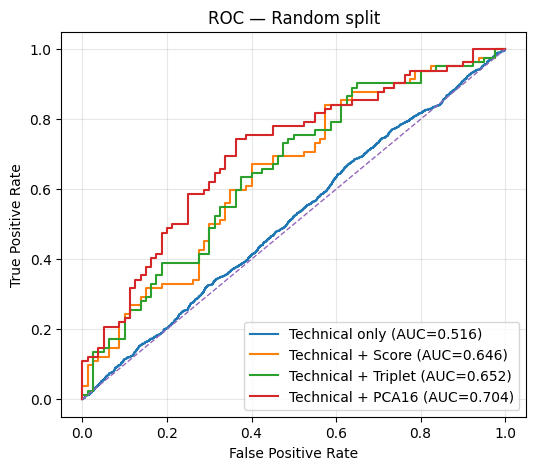

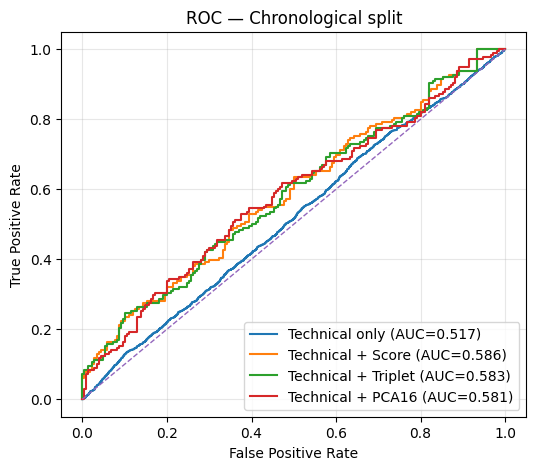

In [59]:
# Cell 5 — ROC plots for all four models (random & chrono)
def plot_rocs(run_outs, title):
    plt.figure(figsize=(6,5))
    for name, out in run_outs.items():
        fpr, tpr, _ = roc_curve(out["ytrue"], out["probs"])
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.3f})")
    plt.plot([0,1],[0,1], linestyle="--", linewidth=1)
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title(title); plt.legend(loc="lower right"); plt.grid(True, alpha=0.3)
    plt.show()

plot_rocs(outs_rnd,  "ROC — Random split")
plot_rocs(outs_chr,  "ROC — Chronological split")



Technical only — Chrono coefficients (standardized)


,coef
sma_5,-0.261
vol_20,-0.066
ret_1d,-0.060
mom_5,-0.046
sma_10,-0.021
rsi,-0.018
mom_20,0.006
mom_10,0.033
sma_20,0.230


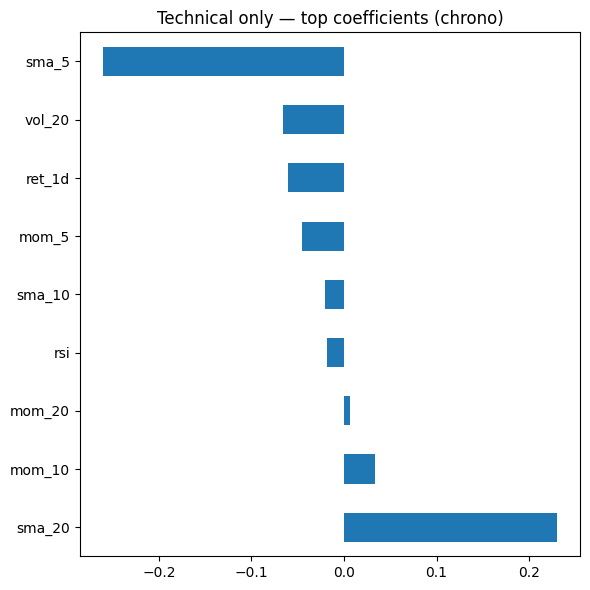


Technical + Score — Chrono coefficients (standardized)


,coef
mom_10,-0.712
sma_10,-0.390
rsi,-0.149
vol_20,-0.087
sma_20,-0.035
mom_20,0.026
ret_1d,0.054
sma_5,0.064
sent_score,0.117
mom_5,0.517


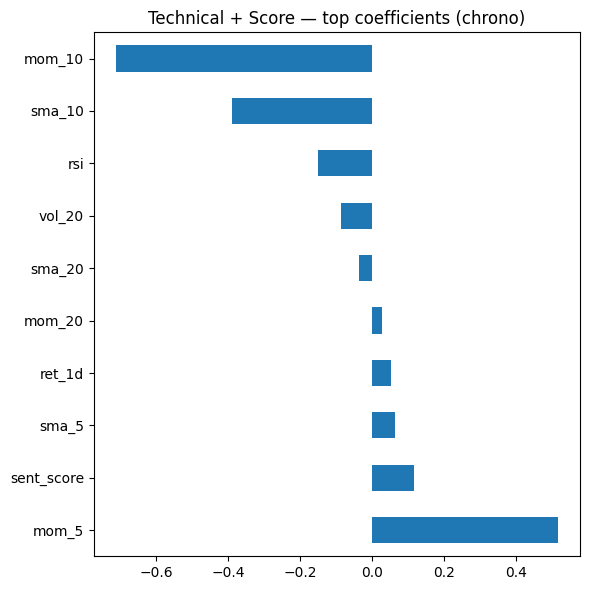


Technical + Triplet — Chrono coefficients (standardized)


,coef
mom_10,-0.717
sma_10,-0.391
rsi,-0.152
vol_20,-0.098
p_neg,-0.090
sma_20,-0.036
p_neu,0.021
mom_20,0.040
ret_1d,0.053
p_pos,0.059


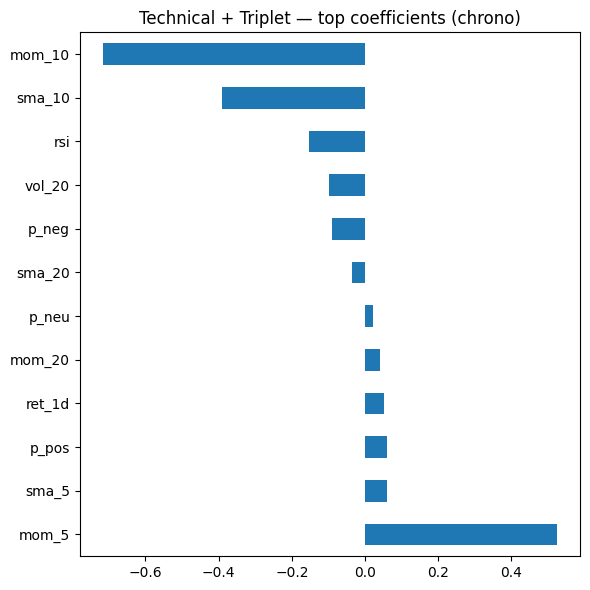


Technical + PCA16 — Chrono coefficients (standardized)


,coef
embed_pca16_01,-0.039
embed_pca16_02,-0.014
sma_20,0.007
embed_pca16_13,0.025
embed_pca16_12,0.053
embed_pca16_14,0.060
embed_pca16_11,0.093
vol_20,0.103
ret_1d,0.134
embed_pca16_15,0.195


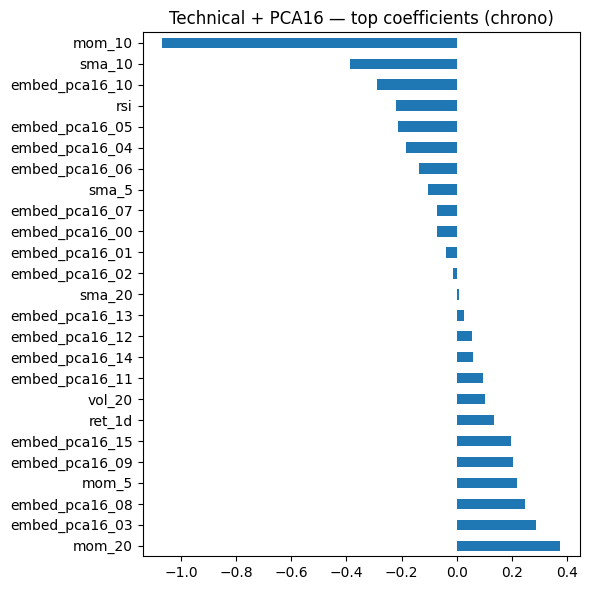

In [60]:
# Cell 6 — standardized coefficients for interpretability
def coef_table(df, feats, out):
    # coefficients are in standardized space thanks to scaler
    coefs = pd.Series(out["model"].coef_.ravel(), index=feats).sort_values()
    return coefs

for name, (df, feats) in configs.items():
    print(f"\n{name} — Chrono coefficients (standardized)")
    coefs = coef_table(df, feats, outs_chr[name])
    display(coefs.to_frame("coef").round(3).tail(15))  # show top positive
    coefs.sort_values(ascending=False, inplace=True)
    coefs.plot(kind="barh", figsize=(6,6))
    plt.title(f"{name} — top coefficients (chrono)")
    plt.tight_layout()
    plt.show()


In [61]:
# Cell 7 — block AUC across the chronological test set
def block_auc(out, blocks=4):
    y, p = out["ytrue"], out["probs"]
    n = len(y)
    edges = np.linspace(0, n, blocks+1, dtype=int)
    rows = []
    for i in range(blocks):
        sl = slice(edges[i], edges[i+1])
        if edges[i+1] - edges[i] < 20:  # tiny blocks can be unstable
            rows.append((i+1, np.nan))
            continue
        rows.append((i+1, roc_auc_score(y[sl], p[sl])))
    return pd.DataFrame(rows, columns=["Block","AUC"]).round(3)

for name in configs.keys():
    print(f"\n{name} — block AUC (chrono test)")
    display(block_auc(outs_chr[name], blocks=4))



Technical only — block AUC (chrono test)


,Block,AUC
0,1,0.508
1,2,0.516
2,3,0.517
3,4,0.531



Technical + Score — block AUC (chrono test)


,Block,AUC
0,1,0.575
1,2,0.556
2,3,0.732
3,4,0.489



Technical + Triplet — block AUC (chrono test)


,Block,AUC
0,1,0.566
1,2,0.555
2,3,0.722
3,4,0.498



Technical + PCA16 — block AUC (chrono test)


,Block,AUC
0,1,0.513
1,2,0.593
2,3,0.540
3,4,0.628


In [62]:
# Cell 8 — compare to majority-class baseline on chrono test
def confusion(out, title):
    y, p = out["ytrue"], out["probs"]
    yhat = (p >= 0.5).astype(int)
    cm = confusion_matrix(y, yhat)
    tn, fp, fn, tp = cm.ravel()
    print(title)
    print(pd.DataFrame(cm, index=["True 0","True 1"], columns=["Pred 0","Pred 1"]))
    print(f"Accuracy={accuracy_score(y,yhat):.3f}, Precision={tp/(tp+fp+1e-9):.3f}, Recall={tp/(tp+fn+1e-9):.3f}\n")

# majority predictor
y_test_chr = outs_chr["Technical only"]["ytrue"]
import numpy as np
maj_class = np.bincount(y_test_chr).argmax()   # most frequent label (0 or 1)
maj = np.full_like(y_test_chr, maj_class)      # array filled with that value

print("Majority baseline on chrono test:")
print(pd.DataFrame(confusion_matrix(y_test_chr, maj),
                   index=["True 0","True 1"], columns=["Pred 0","Pred 1"]))

for name in configs.keys():
    confusion(outs_chr[name], f"{name} — chrono confusion")


Majority baseline on chrono test:
        Pred 0  Pred 1
True 0       0    2698
True 1       0    3162
Technical only — chrono confusion
        Pred 0  Pred 1
True 0     781    1917
True 1     816    2346
Accuracy=0.534, Precision=0.550, Recall=0.742

Technical + Score — chrono confusion
        Pred 0  Pred 1
True 0      97     113
True 1      64     114
Accuracy=0.544, Precision=0.502, Recall=0.640

Technical + Triplet — chrono confusion
        Pred 0  Pred 1
True 0      95     115
True 1      63     115
Accuracy=0.541, Precision=0.500, Recall=0.646

Technical + PCA16 — chrono confusion
        Pred 0  Pred 1
True 0      85     125
True 1      57     121
Accuracy=0.531, Precision=0.492, Recall=0.680



,Config,Accuracy,AUC
0,Tech only,0.534,0.517
1,Tech + Score(decay) + EventW,0.536,0.577
2,Tech + Triplet(decay) + EventW,0.500,0.581
3,Tech + PCA16 + EventW,0.479,0.478


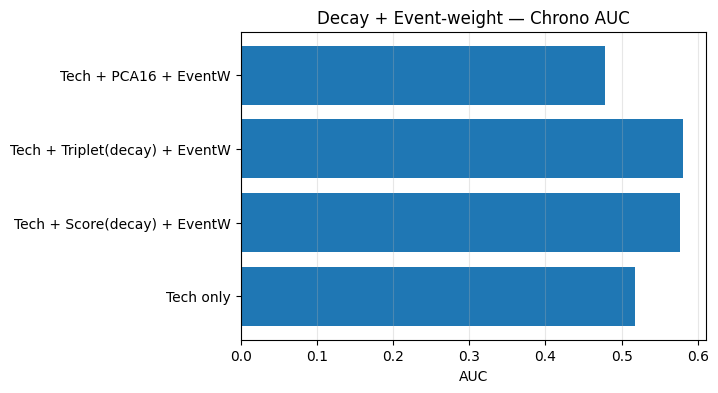

In [63]:
# Cell 9 — requires data/processed/merge_T_plus_news_simple_h5.csv
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

if NEWS_SIMPLE_MERGED.exists():
    df = pd.read_csv(NEWS_SIMPLE_MERGED, parse_dates=["date"]).sort_values(["ticker","date"])
    label = "y_h5" if "y_h5" in df.columns else "y"

    tech_feats = [c for c in ["ret_1d","sma_5","mom_5","sma_10","mom_10","sma_20","mom_20","vol_20","rsi","rsi_14"] if c in df.columns]
    score_cols = [c for c in ["s_sent_score","s_sent_score_decay3"] if c in df.columns]
    trip_cols  = [c for c in ["t_p_pos","t_p_neu","t_p_neg","t_p_pos_decay3","t_p_neu_decay3","t_p_neg_decay3"] if c in df.columns]
    embed_cols = [c for c in df.columns if c.startswith("e_embed_pca16_")]
    evt_cols   = ["event_weight"] if "event_weight" in df.columns else []

    cfgs = {
        "Tech only": tech_feats,
        "Tech + Score(decay) + EventW": tech_feats + score_cols + evt_cols,
        "Tech + Triplet(decay) + EventW": tech_feats + trip_cols  + evt_cols,
        "Tech + PCA16 + EventW": tech_feats + embed_cols + evt_cols,
    }

    def chrono_eval(df, feats):
        d = df.dropna(subset=feats+[label]).copy()
        dates = np.sort(d["date"].unique())
        cut = int(0.7*len(dates))
        split = dates[cut]
        tr, te = d[d["date"]<split], d[d["date"]>=split]
        scaler = StandardScaler()
        Xtr, Xte = scaler.fit_transform(tr[feats]), scaler.transform(te[feats])
        ytr, yte = tr[label].astype(int), te[label].astype(int)
        clf = LogisticRegression(max_iter=2000).fit(Xtr, ytr)
        p = clf.predict_proba(Xte)[:,1]
        return accuracy_score(yte, (p>=0.5)), roc_auc_score(yte, p)

    rows = []
    for k, feats in cfgs.items():
        acc, r = chrono_eval(df, feats); rows.append((k, acc, r))
    tbl = pd.DataFrame(rows, columns=["Config","Accuracy","AUC"]).round(3)
    display(tbl)

    plt.figure(figsize=(6,4))
    plt.barh(tbl["Config"], tbl["AUC"])
    plt.title("Decay + Event-weight — Chrono AUC")
    plt.xlabel("AUC")
    plt.grid(axis="x", alpha=0.3)
    plt.show()
else:
    print("NEWS_SIMPLE_MERGED not found — skip this block.")
